In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True, style='white')

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


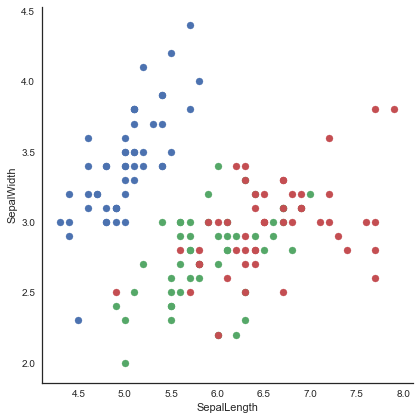

In [3]:
sns.FacetGrid(df, hue="Name", size=6).map(plt.scatter, "SepalLength", "SepalWidth")

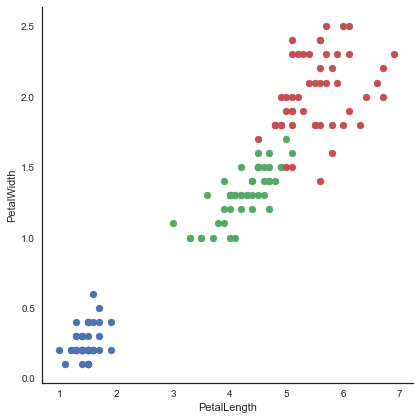

In [4]:
sns.FacetGrid(df, hue="Name", size=6).map(plt.scatter, "PetalLength", "PetalWidth")

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
X = df.drop(['Name'], axis = 1)
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
X = X.as_matrix()

In [8]:
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X[:5]

array([[ 0.22222222,  0.625     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.41666667,  0.06779661,  0.04166667],
       [ 0.11111111,  0.5       ,  0.05084746,  0.04166667],
       [ 0.08333333,  0.45833333,  0.08474576,  0.04166667],
       [ 0.19444444,  0.66666667,  0.06779661,  0.04166667]])

In [11]:
Y = df["Name"]
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15)

In [14]:
from sklearn.svm import SVC

In [15]:
clf1 = SVC()
clf1.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
clf1.score(X_test, Y_test)

1.0

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [18]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train, Y_train)
clf2.score(X_test, Y_test)

1.0

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
m, n = 15, 10
parameters = {'C': [i for i in range(1,m)], 'degree' : [i for i in range(n)]}
clf = SVC(kernel='poly')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.53333333333333333

In [21]:
clf_grid = SVC(kernel = 'poly')
grid = GridSearchCV(clf_grid, parameters, cv=6)
grid.fit(X_train, Y_train)

GridSearchCV(cv=6, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
grid.best_score_

0.96666666666666667

In [23]:
grid.best_params_

{'C': 13, 'degree': 1}

In [24]:
clf = grid.best_estimator_

In [25]:
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

1.0

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
pred = clf.predict(X_test)

In [28]:
matrix = confusion_matrix(Y_test,pred)

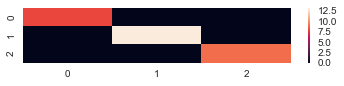

In [29]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
sns.heatmap(matrix)

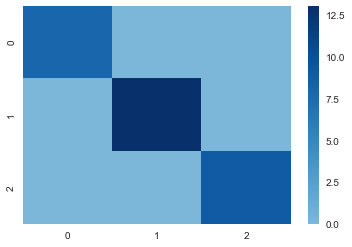

In [30]:
sns.heatmap(matrix, cmap="Blues", center=1)

In [31]:
from sklearn.linear_model import LogisticRegression
clf_try = LogisticRegression()
clf_try.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
clf_try.score(X_test, Y_test)

0.80000000000000004